# Diffusion Equation with Degradation and Production Terms

Here, the basic diffusion equation describing the dynamics of the diffusing particles with concentration $ c(x, t) $ is extended to include constant particle production and degradation terms, which are assumed Biology Physics. Then the diffusion equation is given by:

$$ \partial_t c(x, t) = D \partial_x^2 c(x, t) - \beta c(x, t) + \alpha \chi_{w}(x) $$

where:
- $ D $ is the diffusion coefficient,
- $ \beta $ is the degradation rate,
- $ \alpha $ is the constant production rate, in the particles production region.
- $ \chi_w(x) $ the characteristic shape function  of the particles production region. 
Here, let's assume that particles can be produced in the region centered at $ x = 0 $ with width $ w $

$$ 
    \chi_w(x) = 
        \begin{cases}
            1/w, &\quad x \in [x_0, w] \\
            0, &\quad  x \not\in [x_0, w]
        \end{cases} 
$$

In [1]:
import numpy as np
import matplotlib.patches as patches
import copy
from tqdm import tqdm # library to visualize the progress status of a python loop
from euler_scheme_1d_with_growth.diffusion_equation import *
from euler_scheme_1d_with_growth.matplotlib_defaults import *

In [2]:
D     = 1.0  # Diffusion coefficient
beta  = 1.0  # Degradation rate
alpha = 1.0  # Production rate

w     = 0.4  # width of production region
x0    = 0.4  # starting position width of production region

L0   = 1.8
Lmax = 2 * L0    # system size boundaries are at the positions 0 and +Lmax

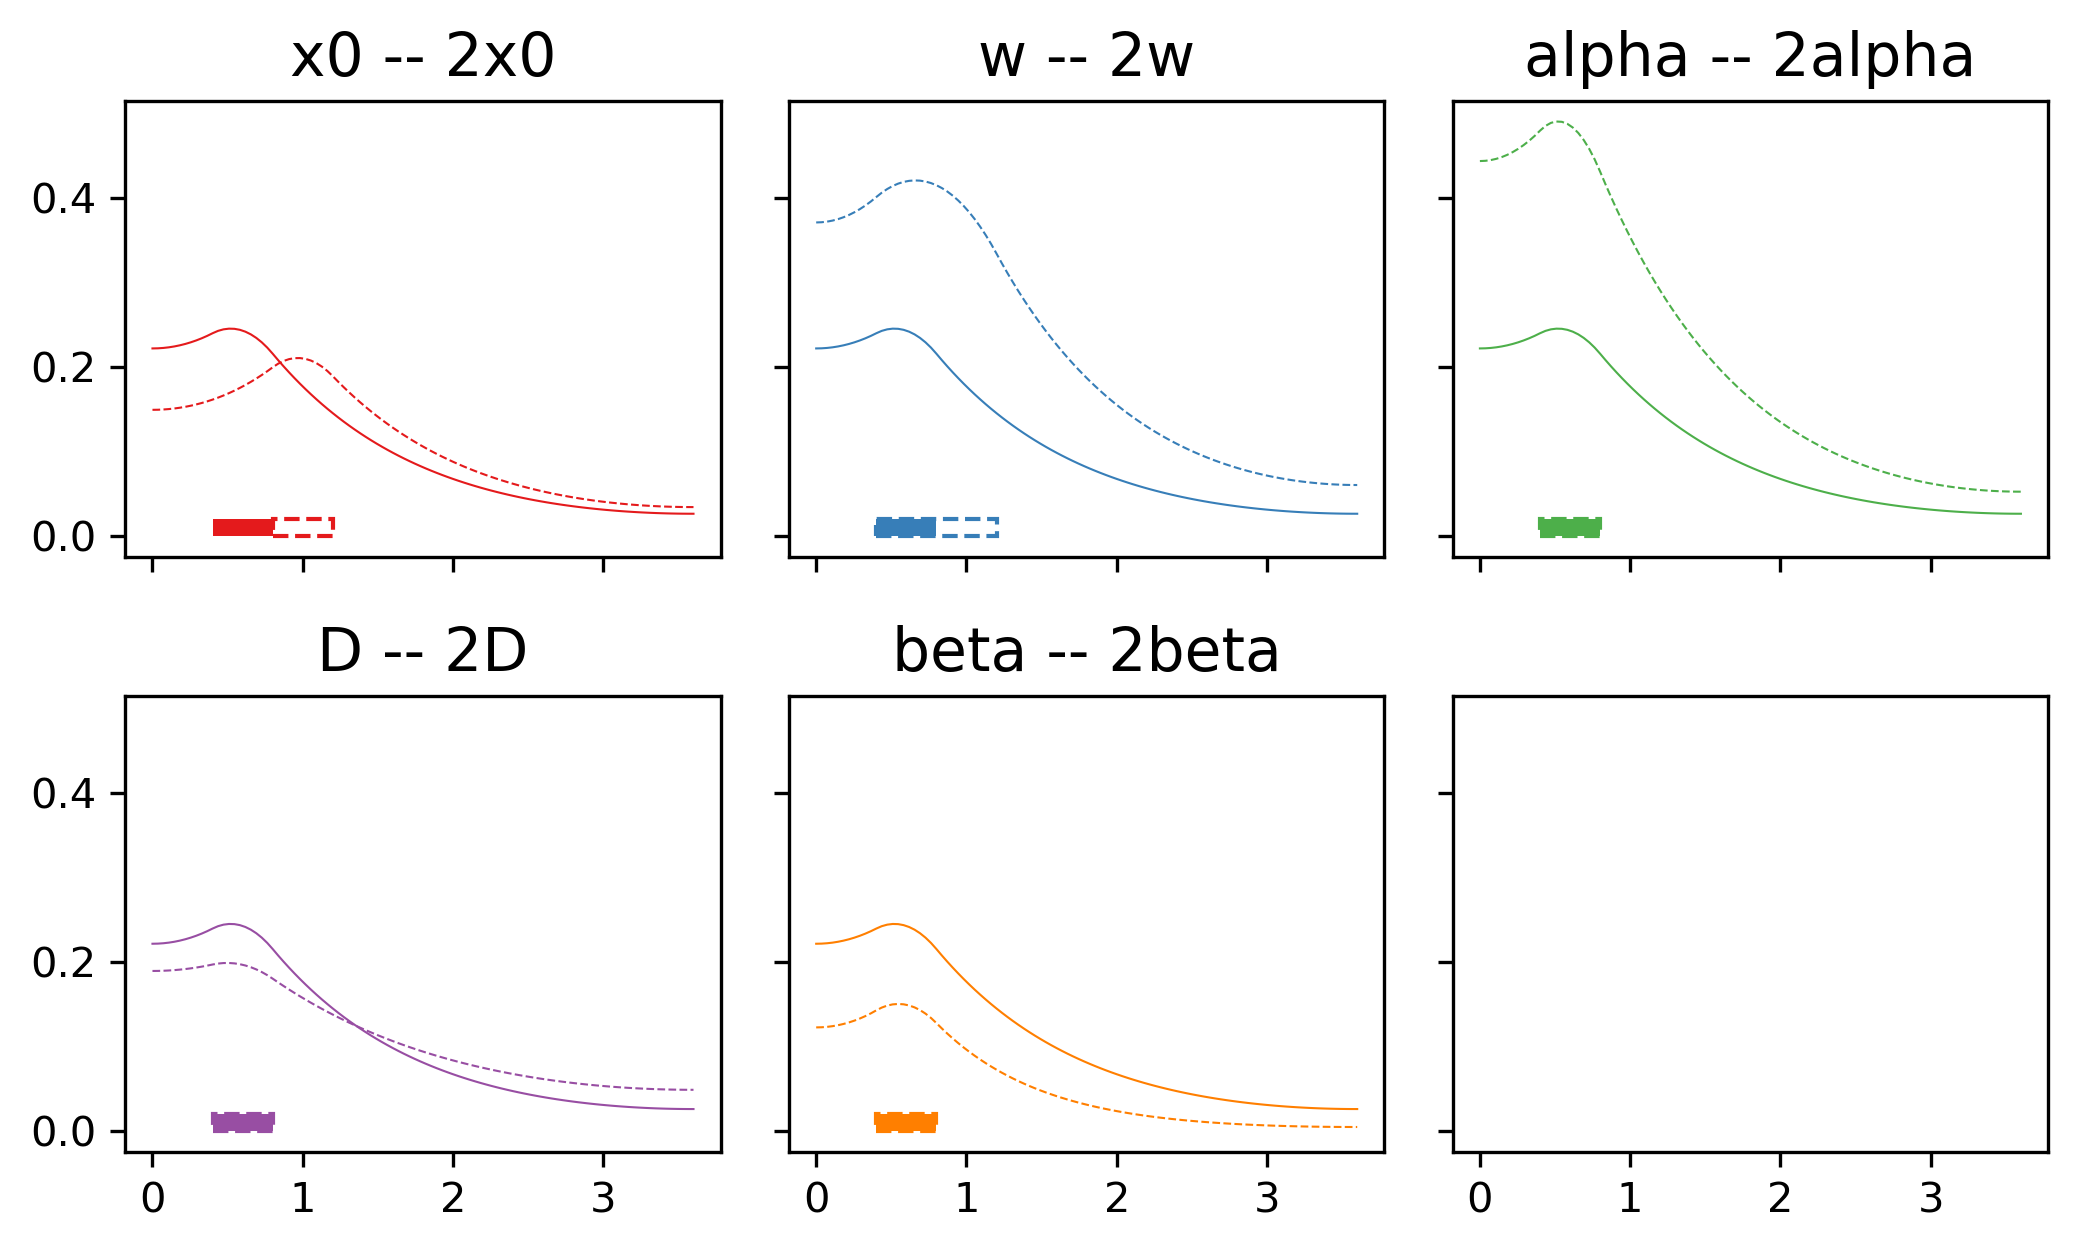

In [3]:
parm = {
    'x0': x0,
    'w':  w,
    'alpha': alpha,
    'D': D,
    'beta': beta
}

nrows, ncols = 2, len( parm.keys()  ) // 2 + 1
colors = plt.cm.Set1.colors

fig, ax = plt.subplots(nrows, ncols, figsize=(default_figsize["large"][0], default_figsize["large"][1]/2), sharex=True, sharey=True, dpi=300)

x = np.linspace(0, Lmax, 100)
ax = ax.flatten()

parm0 = copy.deepcopy(parm)

for i, iparm in enumerate( parm.keys() ): 

    ax[i].add_patch(
             patches.Rectangle((parm['x0'], 0), parm['w'], 0.02, edgecolor=None, facecolor=colors[i])
        )
    ax[i].plot( 
        x, 
        steady_solution(x, parm['x0'], (parm['D']/parm['beta'])**0.5, parm['alpha'], parm['w'], parm['beta'], parm['D'], Lmax), 
        label='Steady state', color=colors[i])
    ax[i].set_title(f'{iparm} -- 2{iparm}')
    
    parm[iparm] = 2 * parm[iparm]
    ax[i].add_patch(
             patches.Rectangle((parm['x0'], 0), parm['w'], 0.02, edgecolor=colors[i], facecolor='none', linestyle='dashed')
        )
    ax[i].plot( 
        x, 
        steady_solution(x, parm['x0'], (parm['D']/parm['beta'])**0.5, parm['alpha'], parm['w'], parm['beta'], parm['D'], Lmax), 
        '--', 
        label='Steady state', color=colors[i])
    ax[i].set_title(f'{iparm} -- 2{iparm}')
    
    parm = copy.deepcopy(parm0)

plt.tight_layout()
plt.savefig('fig/pdd_change.pdf')
plt.show()